# CAD sequence visualizations 

In [1]:
import setup_path  # adds project root to sys.path — keep this first

In [2]:
from utils import cad_model_seq , show_3d

model_path = "/Users/dario/Dropbox/PROJECTS/ML/CAD/data/models/20251218_033650_brass_spacer_tube_v1.py"
seq = cad_model_seq(model_path)
seq.keys()

dict_keys(['step0', 'step1', 'step2', 'step3', 'result'])

number of cad steps:  5


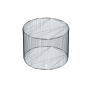

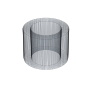

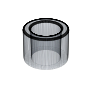

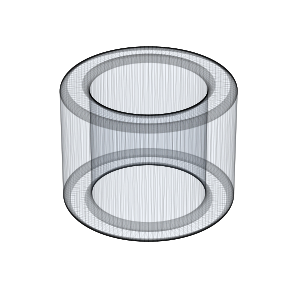

In [ ]:
print('number of cad steps: ', len(seq))

show_3d(seq['step0'], figsize=(1, 1), color="lightsteelblue")
show_3d(seq['step1'], figsize=(1, 1), color="lightsteelblue")
show_3d(seq['step2'], figsize=(1, 1), color="lightsteelblue")
show_3d(seq['step3'], figsize=(3, 3), color="lightsteelblue")

More complex example:

In [ ]:
from utils import cad_model_seq , show_3d

model_path = "/Users/dario/Dropbox/PROJECTS/ML/CAD/data/models/20251218_033722__adjustable_step_pulley_for_precision_v1.py"
seq_adjustable_step_pulley = cad_model_seq(model_path)
seq_adjustable_step_pulley.keys()

dict_keys(['step0', 'step1', 'step2', 'step3', 'step4', 'step5', 'step6', 'step7', 'result'])

number of cad steps:  5


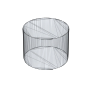

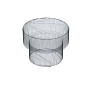

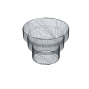

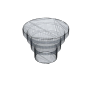

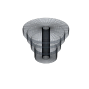

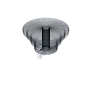

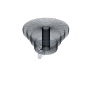

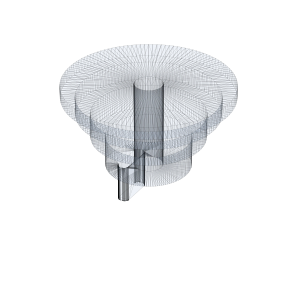

In [ ]:
print('number of cad steps: ', len(seq))

show_3d(seq_adjustable_step_pulley['step0'], figsize=(1, 1), color="lightsteelblue")
show_3d(seq_adjustable_step_pulley['step1'], figsize=(1, 1), color="lightsteelblue")
show_3d(seq_adjustable_step_pulley['step2'], figsize=(1, 1), color="lightsteelblue")
show_3d(seq_adjustable_step_pulley['step3'], figsize=(1, 1), color="lightsteelblue")
show_3d(seq_adjustable_step_pulley['step4'], figsize=(1, 1), color="lightsteelblue")
show_3d(seq_adjustable_step_pulley['step5'], figsize=(1, 1), color="lightsteelblue")
show_3d(seq_adjustable_step_pulley['step6'], figsize=(1, 1), color="lightsteelblue")
show_3d(seq_adjustable_step_pulley['step7'], figsize=(3, 3), color="lightsteelblue")

# Metrics for comparing CAD models

The comparison can be done sequentially comparing the models at step_0 first, then step_1, and so on... This way we can identify the first wrong step in the CAD model sequence.

## 1. Surface area / volume metrics

In [ ]:
from metrics import shape_surface_area_dist, shape_volume_dist

print(shape_surface_area_dist(seq['step0'], seq['step1']))
print(shape_volume_dist(seq['step0'], seq['step1']))

{'area1': 603.0529964365842, 'area2': 753.8650636643933, 'abs_diff': 150.81206722780917, 'rel_diff': 0.2500809516227456}
{'vol1': 1130.9733552923256, 'vol2': 628.3185307179585, 'abs_diff': 502.654824574367, 'rel_diff': 0.44444444444444453}


In [ ]:
print(shape_surface_area_dist(seq['step1'], seq['step2']))
print(shape_volume_dist(seq['step1'], seq['step2']))

{'area1': 753.8650636643933, 'area2': 740.3797721721514, 'abs_diff': 13.485291492241913, 'rel_diff': 0.01788820326371473}
{'vol1': 628.3185307179585, 'vol2': 624.9475729513713, 'abs_diff': 3.370957766587253, 'rel_diff': 0.005365045915063769}


## 2. Point cloud metrics: Hausdorf & Chamfer distance

We run the CAD model to get the 3D shape and then convert to a point cloud representation. Whe can then use various point clouds metrics to compare the VLM generated CAD models with ground truth. 


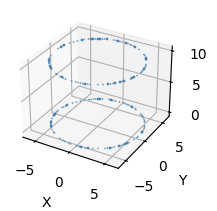

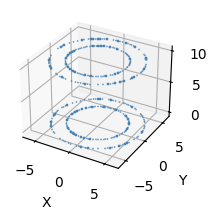

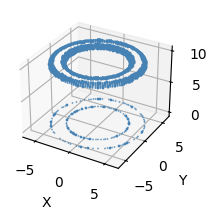

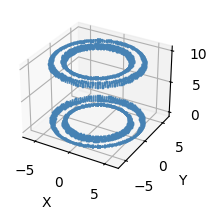

In [2]:
from utils import shape_to_pointcloud, shape_to_uniform_pointcloud, show_3d_point_cloud

shape0 = shape_to_pointcloud(seq["step0"],  tol=0.1)
shape1 = shape_to_pointcloud(seq["step1"],  tol=0.1)
shape2 = shape_to_pointcloud(seq["step2"],  tol=0.1)
shape3 = shape_to_pointcloud(seq["step3"],  tol=0.1)
show_3d_point_cloud(shape0, figsize=(2, 2))
show_3d_point_cloud(shape1, figsize=(2, 2))
show_3d_point_cloud(shape2, figsize=(2, 2))
show_3d_point_cloud(shape3, figsize=(2, 2))

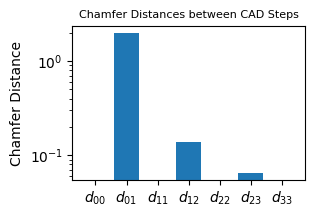

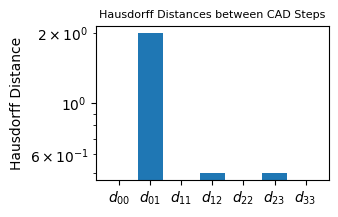

In [3]:
import matplotlib.pyplot as plt

from metrics import point_cloud_dist

d00 = point_cloud_dist(seq['step0'], seq['step0'])
d01 = point_cloud_dist(seq['step0'], seq['step1'])
d11 = point_cloud_dist(seq['step1'], seq['step1'])
d12 = point_cloud_dist(seq['step1'], seq['step2'])
d22 = point_cloud_dist(seq['step2'], seq['step2'])
d23 = point_cloud_dist(seq['step2'], seq['step3'])
d33 = point_cloud_dist(seq['step3'], seq['step3'])

# plot bar chart of chamfer distances

fig, ax = plt.subplots(figsize=(3, 2))
labels = [r'$d_{00}$', r'$d_{01}$', '$d_{11}$', r'$d_{12}$', r'$d_{22}$', r'$d_{23}$', r'$d_{33}$']
chamfer_distances = [d00['chamfer'],d01['chamfer'], d11['chamfer'], d12['chamfer'], d22['chamfer'], d23['chamfer'], d33['chamfer']]
plt.bar(labels, chamfer_distances)
plt.ylabel('Chamfer Distance')
plt.title('Chamfer Distances between CAD Steps', fontsize=8)
# log
plt.yscale('log')
plt.show()

#plot bar chart of hausdorff distances

fig, ax = plt.subplots(figsize=(3, 2))
labels = [r'$d_{00}$', r'$d_{01}$', '$d_{11}$', r'$d_{12}$', r'$d_{22}$', r'$d_{23}$', r'$d_{33}$']
hausdorff_distances = [d00['hausdorff'],d01['hausdorff'], d11['hausdorff'], d12['hausdorff'], d22['hausdorff'], d23['hausdorff'], d33['hausdorff']]
plt.bar(labels, hausdorff_distances)
plt.ylabel('Hausdorff Distance')
plt.title('Hausdorff Distances between CAD Steps', fontsize=8)
plt.yscale('log')

### uniform poiont cloud [not very useful]

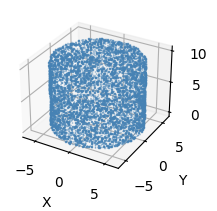

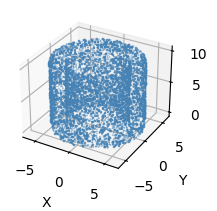

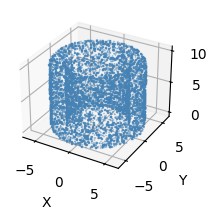

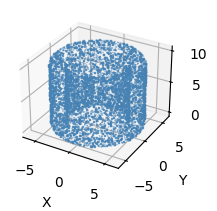

In [ ]:

shape0 = shape_to_uniform_pointcloud(seq['step0'], n_points=10000, tol=0.05)
shape1 = shape_to_uniform_pointcloud(seq['step1'], n_points=10000, tol=0.05)
shape2 = shape_to_uniform_pointcloud(seq['step2'], n_points=10000, tol=0.05)
shape3 = shape_to_uniform_pointcloud(seq['step3'], n_points=10000, tol=0.05)

show_3d_point_cloud(shape0, figsize=(2, 2))
show_3d_point_cloud(shape1, figsize=(2, 2))
show_3d_point_cloud(shape2, figsize=(2, 2))
show_3d_point_cloud(shape3, figsize=(2, 2))



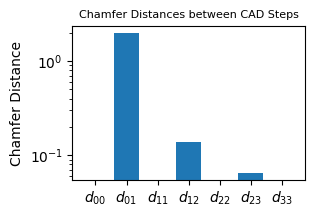

In [ ]:
import matplotlib.pyplot as plt

from metrics import point_cloud_dist

d00 = point_cloud_dist(seq['step0'], seq['step0'])
d01 = point_cloud_dist(seq['step0'], seq['step1'])
d11 = point_cloud_dist(seq['step1'], seq['step1'])
d12 = point_cloud_dist(seq['step1'], seq['step2'])
d22 = point_cloud_dist(seq['step2'], seq['step2'])
d23 = point_cloud_dist(seq['step2'], seq['step3'])
d33 = point_cloud_dist(seq['step3'], seq['step3'])

# plot bar chart of chamfer distances

fig, ax = plt.subplots(figsize=(3, 2))
labels = [r'$d_{00}$', r'$d_{01}$', '$d_{11}$', r'$d_{12}$', r'$d_{22}$', r'$d_{23}$', r'$d_{33}$']
chamfer_distances = [d00['chamfer'],d01['chamfer'], d11['chamfer'], d12['chamfer'], d22['chamfer'], d23['chamfer'], d33['chamfer']]
plt.bar(labels, chamfer_distances)
plt.ylabel('Chamfer Distance')
plt.title('Chamfer Distances between CAD Steps', fontsize=8)
# log
plt.yscale('log')
plt.show()

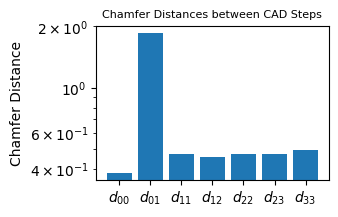

In [ ]:

N=1000 # number of points to sample from each shape 
tol=0.05

d00 = point_cloud_dist(seq['step0'], seq['step0'], uniform=True, n_points=N, tol=tol)
d01 = point_cloud_dist(seq['step0'], seq['step1'], uniform=True, n_points=N, tol=tol)
d11 = point_cloud_dist(seq['step1'], seq['step1'], uniform=True, n_points=N, tol=tol)
d12 = point_cloud_dist(seq['step1'], seq['step2'], uniform=True, n_points=N, tol=tol)
d22 = point_cloud_dist(seq['step2'], seq['step2'], uniform=True, n_points=N, tol=tol)
d23 = point_cloud_dist(seq['step2'], seq['step3'], uniform=True, n_points=N, tol=tol)
d33 = point_cloud_dist(seq['step3'], seq['step3'], uniform=True, n_points=N, tol=tol)

# plot bar chart of chamfer distances

fig, ax = plt.subplots(figsize=(3, 2))
labels = [r'$d_{00}$', r'$d_{01}$', '$d_{11}$', r'$d_{12}$', r'$d_{22}$', r'$d_{23}$', r'$d_{33}$']
chamfer_distances = [d00['chamfer'],d01['chamfer'], d11['chamfer'], d12['chamfer'], d22['chamfer'], d23['chamfer'], d33['chamfer']]
plt.bar(labels, chamfer_distances)
plt.ylabel('Chamfer Distance')
plt.title('Chamfer Distances between CAD Steps', fontsize=8)
plt.yscale('log')
plt.show()


zoom in on steps 1->2, 2->3

In [ ]:
fig, ax = plt.subplots(figsize=(3, 2))
labels = [r'$d_{11}$', r'$d_{12}$', r'$d_{22}$', r'$d_{23}$', r'$d_{33}$']
chamfer_distances = [d11['chamfer'], d12['chamfer'], d22['chamfer'], d23['chamfer'], d33['chamfer']]
plt.bar(labels, chamfer_distances)
plt.ylabel('Chamfer Distance')
plt.title('Chamfer Distances between CAD Steps')
plt.show()


Discussion:
- Our metric picks the design change step_0 -> step_1 (cylinder to torus) but it can't detect the later small changes in the following steps. These are indistinguishable from the "noise" d11, d22, d33. Why are these values not zero if it is the distance of a point cloud with itself?

- The reason is because we are sampling uniform points over a 3D shape, there is an artifical characterisic scale introduced by finite sampling from the uniform distribution. That is why the distance dist(x,x) is not zero.

- We can correct for this finitie sampling bias by sampling more points so that the point cloud becomes more dense and the average inter-point distance becomes negligible (computationally expensive). We also need to perform several runs and average to tame statistical fluctuations.



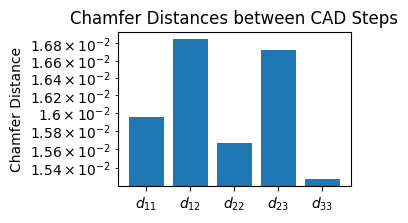

In [ ]:
N=30_000
tol=0.005

d00 = shape_distance(seq['step0'], seq['step0'], n_points=N, tolerance=tol)
d01 = shape_distance(seq['step0'], seq['step1'], n_points=N, tolerance=tol)
d11 = shape_distance(seq['step1'], seq['step1'], n_points=N, tolerance=tol)
d12 = shape_distance(seq['step1'], seq['step2'], n_points=N, tolerance=tol)
d22 = shape_distance(seq['step2'], seq['step2'], n_points=N, tolerance=tol)
d23 = shape_distance(seq['step2'], seq['step3'], n_points=N, tolerance=tol)
d33 = shape_distance(seq['step3'], seq['step3'], n_points=N, tolerance=tol)


# plot bar chart of chamfer distances

fig, ax = plt.subplots(figsize=(3, 2))
labels = [r'$d_{11}$', r'$d_{12}$', r'$d_{22}$', r'$d_{23}$', r'$d_{33}$']
chamfer_distances = [d11['chamfer'], d12['chamfer'], d22['chamfer'], d23['chamfer'], d33['chamfer']]
plt.bar(labels, chamfer_distances)
plt.ylabel('Chamfer Distance')
plt.title('Chamfer Distances between CAD Steps')
# log
plt.yscale('log')
plt.show()


With N=100K points our metrics d12 and d13 are able to pick up the small design changes in the last two steps:

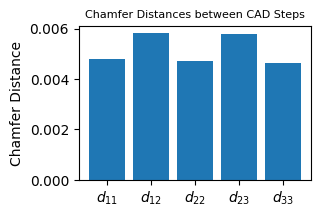

(np.float64(0.0038448947392615996),
 np.float64(1.4136566472231404),
 np.float64(0.004786138197086997),
 np.float64(0.005813401920377799),
 np.float64(0.0046973093674949114),
 np.float64(0.005783157335617618),
 np.float64(0.0046299836418453415))

In [ ]:
N=100_000
tol=0.005

d00 = shape_distance(seq['step0'], seq['step0'], n_points=N, tolerance=tol)
d01 = shape_distance(seq['step0'], seq['step1'], n_points=N, tolerance=tol)
d11 = shape_distance(seq['step1'], seq['step1'], n_points=N, tolerance=tol)
d12 = shape_distance(seq['step1'], seq['step2'], n_points=N, tolerance=tol)
d22 = shape_distance(seq['step2'], seq['step2'], n_points=N, tolerance=tol)
d23 = shape_distance(seq['step2'], seq['step3'], n_points=N, tolerance=tol)
d33 = shape_distance(seq['step3'], seq['step3'], n_points=N, tolerance=tol)

# plot bar chart of chamfer distances

fig, ax = plt.subplots(figsize=(3, 2))
labels = [r'$d_{11}$', r'$d_{12}$', r'$d_{22}$', r'$d_{23}$', r'$d_{33}$']
chamfer_distances = [d11['chamfer'], d12['chamfer'], d22['chamfer'], d23['chamfer'], d33['chamfer']]
plt.bar(labels, chamfer_distances)
plt.ylabel('Chamfer Distance')
plt.title('Chamfer Distances between CAD Steps', fontsize=8)
# log
# plt.yscale('log')
plt.show()

d00['chamfer'], d01['chamfer'], d11['chamfer'], d12['chamfer'], d22['chamfer'], d23['chamfer'], d33['chamfer']

## 3. Two-point correlation functions: Landy-Szalay-style correlators

This quanittyh is a gold-standard statistic in in astrophysics and cosmology. The Landy-Szalay estimator $\xi(r)$ measures excess probability of finding a pair of galaxies at separation $r$ relative to a homogeneous uniform distirbution (poisson process). We can recast this metric to our problem and use it to measure discrepancy between pairs of CAD point clouds.

Benefit over Chamfer and Hasdorf is that the correlators are rotation invariant, since it always computes distances between pairs of points.

In [2]:
def plot_2_point_corr(xi, r, varxi=None, log=False):
    fig, ax = plt.subplots(figsize=(5, 3))
    ax.plot(r, xi, color="steelblue", linewidth=1.5, label=r"$\xi(r)$")
    if varxi is not None:
        ax.fill_between(r, xi - varxi**0.5, xi + varxi**0.5, alpha=0.25, color="steelblue", label=r"$\pm\sigma$")
    ax.axhline(0, color="k", linewidth=0.8, linestyle="--")
    if log:
        ax.set_xscale("log")
    ax.set_xlabel("r  [mm]")
    ax.set_ylabel(r"$\xi(r)$")
    ax.set_title("Landy-Szalay 2-point correlator", fontsize=8)
    ax.legend(fontsize=8)
    plt.tight_layout()
    plt.show()

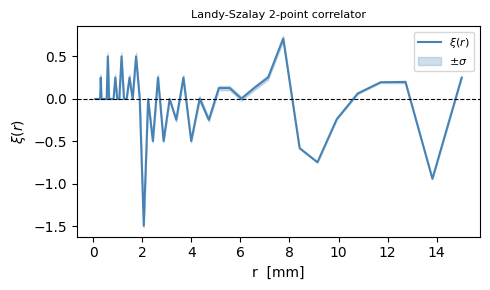

L2 = 2.7170   chi2 = 41537808.06


In [6]:
import matplotlib.pyplot as plt

from metrics import two_point_corr_Landy_Szalay, two_point_corr_dist

r, xi, varxi = two_point_corr_Landy_Szalay(seq["step0"], seq["step1"], n_bins=64)
d = two_point_corr_dist(seq["step0"], seq["step1"], n_bins=100)

plot_2_point_corr(xi, r, varxi)
print(f"L2 = {d['l2']:.4f}   chi2 = {d['chi2']:.2f}")

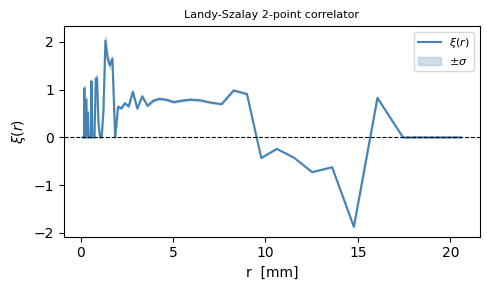

L2 = 6.3005   chi2 = 3977949.42


In [7]:
import matplotlib.pyplot as plt

from metrics import two_point_corr_Landy_Szalay, two_point_corr_dist

r, xi, varxi = two_point_corr_Landy_Szalay(seq["step1"], seq["step2"], n_bins=64)
d = two_point_corr_dist(seq["step1"], seq["step2"], n_bins=100)

plot_2_point_corr(xi, r, varxi)
print(f"L2 = {d['l2']:.4f}   chi2 = {d['chi2']:.2f}")

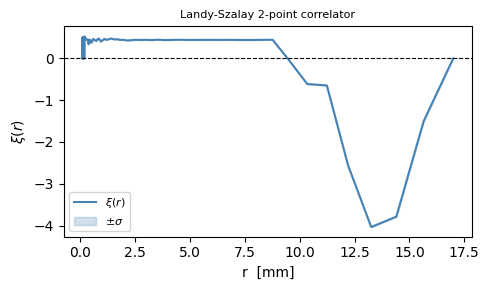

L2 = 9.5321   chi2 = 19814611327.65


In [8]:
import matplotlib.pyplot as plt

from metrics import two_point_corr_Landy_Szalay, two_point_corr_dist

r, xi, varxi = two_point_corr_Landy_Szalay(seq["step2"], seq["step3"], n_bins=64)
d = two_point_corr_dist(seq["step2"], seq["step3"], n_bins=100)

plot_2_point_corr(xi, r, varxi)
print(f"L2 = {d['l2']:.4f}   chi2 = {d['chi2']:.2f}")

## 4. Metric correlation study

Before combining metrics in a p-value test, we check how redundant they are across a population of shape pairs. If two metrics are highly correlated (|ρ| > 0.7) they carry the same information — including both inflates the degrees of freedom without improving test power.

**Setup:** consecutive build-step pairs within models (small–medium change) + random cross-model result pairs (large change). Five metrics: `area_rel`, `vol_rel` (deterministic scalars), `chamfer`, `hausdorff` (KDTree), `xi_l2` (LS 2PCF, rotation-invariant).

In [9]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from utils import cad_model_seq
from metrics import shape_surface_area_dist, shape_volume_dist, point_cloud_dist, two_point_corr_dist

DATA_DIR  = Path("/Users/dario/Dropbox/PROJECTS/ML/CAD/data/models")
all_files = sorted(DATA_DIR.glob("*.py"))[:35]

pairs = []

# within-model: consecutive step pairs  (small → medium distances)
for f in all_files:
    try:
        s    = cad_model_seq(str(f))
        keys = sorted(k for k in s if k.startswith("step"))
        for i in range(len(keys) - 1):
            pairs.append((s[keys[i]], s[keys[i + 1]]))
    except Exception:
        pass

# cross-model: random result pairs  (large distances, clearly different shapes)
results = []
for f in all_files[:20]:
    try:
        s = cad_model_seq(str(f))
        if "result" in s:
            results.append(s["result"])
    except Exception:
        pass

rng       = np.random.default_rng(0)
cross_idx = rng.permutation(len(results))
for k in range(0, len(cross_idx) - 1, 2):
    pairs.append((results[cross_idx[k]], results[cross_idx[k + 1]]))

print(f"Total pairs collected: {len(pairs)}")

Total pairs collected: 123


In [10]:
TOL = 0.15  

records = []
for obj1, obj2 in pairs:
    try:
        area = shape_surface_area_dist(obj1, obj2, tol=TOL)['rel_diff']
        vol  = shape_volume_dist(obj1, obj2)['rel_diff']
        pc   = point_cloud_dist(obj1, obj2, tol=TOL)
        xi   = two_point_corr_dist(obj1, obj2, tol=TOL, n_bins=20)
        row  = dict(
            area_rel  = area,
            vol_rel   = vol,
            chamfer   = pc['chamfer'],
            hausdorff = pc['hausdorff'],
            xi_l2     = xi['l2'],
        )
        if all(np.isfinite(v) for v in row.values()):
            records.append(row)
    except Exception:
        pass

print(f"Valid pairs: {len(records)}")

Valid pairs: 123


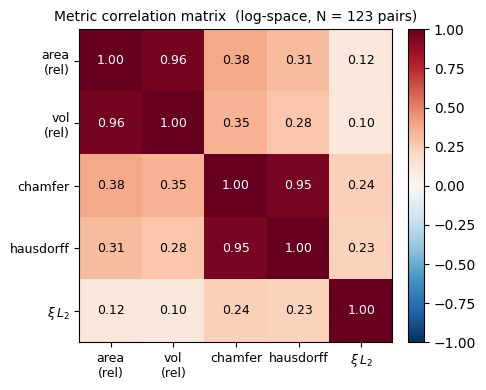

Selected metrics  (pairwise |ρ| < 0.7):  ['xi_l2', 'vol_rel', 'hausdorff']
  |ρ( vol_rel,  xi_l2 )| = 0.102
  |ρ( vol_rel,  hausdorff )| = 0.279
  |ρ( hausdorff,  xi_l2 )| = 0.228


In [11]:
METRICS = ['area_rel', 'vol_rel', 'chamfer', 'hausdorff', 'xi_l2']
LABELS  = ['area\n(rel)', 'vol\n(rel)', 'chamfer', 'hausdorff', r'$\xi\,L_2$']

X     = np.array([[r[m] for m in METRICS] for r in records])
X_log = np.log1p(np.clip(X, 0, None))   # log-space: metrics span orders of magnitude
corr  = np.corrcoef(X_log.T)

fig, ax = plt.subplots(figsize=(5, 4))
im = ax.imshow(corr, cmap='RdBu_r', vmin=-1, vmax=1)
ax.set_xticks(range(len(LABELS)));  ax.set_xticklabels(LABELS, fontsize=9)
ax.set_yticks(range(len(LABELS)));  ax.set_yticklabels(LABELS, fontsize=9)
for i in range(len(METRICS)):
    for j in range(len(METRICS)):
        c = 'white' if abs(corr[i, j]) > 0.65 else 'black'
        ax.text(j, i, f"{corr[i, j]:.2f}", ha='center', va='center', fontsize=9, color=c)
plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
ax.set_title(f"Metric correlation matrix  (log-space, N = {len(records)} pairs)", fontsize=10)
plt.tight_layout()
plt.show()

# --- greedy selection: keep metrics with all pairwise |ρ| < threshold ---
THRESHOLD = 0.70
abs_corr  = np.abs(corr).copy()
np.fill_diagonal(abs_corr, 0)

remaining = list(range(len(METRICS)))
start     = int(np.argmin(abs_corr.mean(axis=1)))
selected  = [start]
remaining.remove(start)
while remaining:
    max_to_sel = [abs_corr[r, selected].max() for r in remaining]
    best_pos   = int(np.argmin(max_to_sel))
    if max_to_sel[best_pos] > THRESHOLD:
        break
    selected.append(remaining.pop(best_pos))

sel_names = [METRICS[i] for i in selected]
print(f"Selected metrics  (pairwise |ρ| < {THRESHOLD}):  {sel_names}")
for a in selected:
    for b in selected:
        if a < b:
            print(f"  |ρ( {METRICS[a]},  {METRICS[b]} )| = {abs(corr[a, b]):.3f}")

**Interpretation.** Metrics within the same "family" cluster:
- `area_rel` ↔ `vol_rel` — global geometry scalars, typically highly correlated.
- `chamfer` ↔ `hausdorff` — derived from the same nearest-neighbour query.
- `xi_l2` — rotation-invariant, pairwise distances *within* each cloud; structurally different.

# Testing VLMs: ChatGPT-5.2

prompt:

`Task: Since you are a VLM model, I want to test how good you are at 0-shot reading 2D blueprints for various 3D objects. I will give you an image and you have to provide me the corresponding CAD model in cadquery python. Description of input images: the blueprints have several 2D views of the same objects and sometimes the 3D (diagonal) view is included when the complexity of the object requires smaller rotations to resolve the structure. The blueprints have are black & white and also include dimensions and transparency shown by dashed edges. Description of models: the output model should be in python with the following structure:` 


`import cadquery as cq `

`step0 = cq.Workplane("XY").<> `

`step1 = step0. <> `

`<> `

`stepN = step(N-1)`

`where <> is a placeholder you will fill based on the 2D image input I give you.`

We the gave the image corresponding to 20251218_033650_brass_spacer_tube_v1.py".

Output:


In [3]:
# ChatGPT-5.2 output after 7' of reasoning:

import cadquery as cq
# Assumed units: mm
OD = 12.0          # outer diameter
ID = 8.0           # inner diameter (from end-view circle ratio)
L  = 10.0          # overall length
R  = 0.5           # edge round on both OD/ID at both ends (from ring offsets)
step0 = cq.Workplane("XY").circle(OD/2).extrude(L, both=True)
step1 = step0.faces(">Z").workplane().circle(ID/2).cutThruAll()
step2 = step1.edges("%Circle").fillet(R)


ChatGpT analyzed the image correctly as seen in the description of the dimensions and produced a more efficient CAD model with only 3 steps. 

number of cad steps:  4


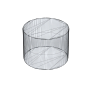

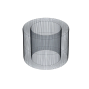

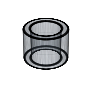

In [4]:
seq_chatgpt_gen = {"step0": step0, "step1": step1, "step2": step2, 'result': step2}

print('number of cad steps: ', len(seq_chatgpt_gen))

show_3d(seq_chatgpt_gen['step0'], figsize=(1, 1), color="lightsteelblue")
show_3d(seq_chatgpt_gen['step1'], figsize=(1, 1), color="lightsteelblue")
show_3d(seq_chatgpt_gen['step2'], figsize=(1, 1), color="lightsteelblue")

In [5]:
from metrics import shape_volume_dist, point_cloud_dist, two_point_corr_dist, shape_pvalue

def results(obj1, obj2):
    dV    = shape_volume_dist(obj1, obj2)['rel_diff']
    haus  = point_cloud_dist(obj1, obj2)['hausdorff']
    xi_L2 = two_point_corr_dist(obj1, obj2, n_bins=64)['l2']
    pv    = shape_pvalue(obj1, obj2, n_bins=20)

    print(f"Volume Relative Difference:  {dV:.4f}")
    print(f"Hausdorff Distance:          {haus:.4f}")
    print(f"xi(r) Landy-Szalay L2:       {xi_L2:.4f}")
    print(f"p-value (Fisher):            {pv['p_value']:.4f}  "
          f"[z_hausdorff={pv['z_scores']['hausdorff']:.2f}, "
          f"z_chamfer={pv['z_scores']['chamfer']:.2f}]")
    return {"vol_rel": dV, "hausdorff": haus, "xi_l2": xi_L2, "p_value": pv['p_value']}

In [8]:
results(seq['step2'], seq['step2'])

Volume Relative Difference:  0.0000
Hausdorff Distance:          0.0000
xi(r) Landy-Szalay L2:       0.0016
p-value (Fisher):            1.0000  [z_hausdorff=0.00, z_chamfer=0.00]


{'vol_rel': 0.0,
 'hausdorff': np.float64(0.0),
 'xi_l2': 0.0016073737354207072,
 'p_value': 0.9999999999999939}

Results above show a huge discrepancy in all metrics. Since the volume error is worst than area this suggests the model made a mistake in implementing the overall dimensions in the H x W x L of the object. The error is from the start at `step0`:

In [13]:
results(seq['step0'], seq_chatgpt_gen['step0'])

Volume Relative Difference: 1.0000
Hausdorff Distance: 10.0000
$xi(r)$ Landay-Szalay: 1.6612


{'vol_rel': 1.0, 'hausdorff': np.float64(10.0), 'xi_l2': 1.6612074142095383}


origin of the error at step0:

`.extrude(L, both=True)`

correct syntax is:  `.extrude(L, both=False)`

The resulting object has the correct shape, but incorrect dimensions (height is 2x larger than ground truth)